## About The Dataset

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.


### Features
1.battery_power: Total energy a battery can store in one time measured in mAh

2.blue: Has bluetooth or not

3.clock_speed: speed at which microprocessor executes instructions

4.dual_sim: Has dual sim support or not

5.fc: Front Camera mega pixels

6.four_g: Has 4G or not

7.int_memory: Internal Memory in Gigabytes

8.m_dep: Mobile Depth in cm

9.mobile_wt: Weight of mobile phone

10.n_cores: Number of cores of processor

11.pc: Primary Camera mega pixels

12.px_height: Pixel Resolution Height

13.px_width: Pixel Resolution Width

14.ram: Random Access Memory in Mega Bytes

15.sc_h: Screen Height of mobile in cm

16.sc_w: Screen Width of mobile in cm

17.talk_time: longest time that a single battery charge will last 

18.three_g: Has 3G or not

19.touch_screen: Has touch screen or not

20.wifi: Has wifi or not

21.price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).                            

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
project_data = pd.read_csv("../input/mobile-price-classification/train.csv")

In [3]:
x=project_data.shape
print("Number of Data points/Observations in train dataset are:-",x[0])
print("Number of Features in train dataset  are:-",x[1])



Number of Data points/Observations in train dataset are:- 2000
Number of Features in train dataset  are:- 21


In [4]:
#sample of our Data
project_data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
#checking for the null values
project_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Observation:-                     
There are no NULL values in these features

In [6]:
#basic info like datatype of the features 
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


Text(0.5, 1.0, 'Correlation ')

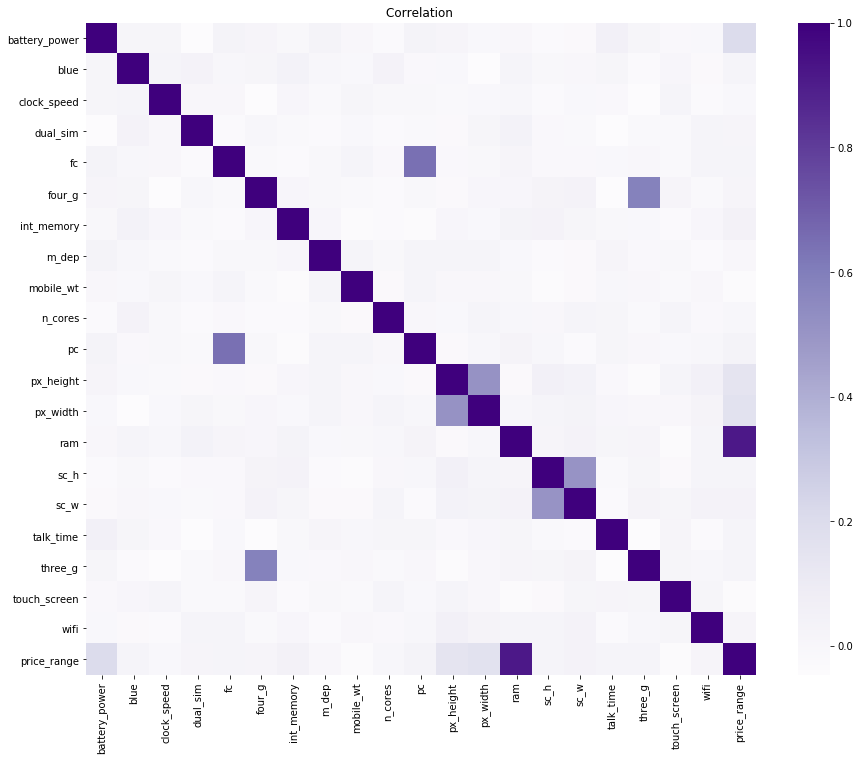

In [7]:
#to find the corelation between the columns
corr=project_data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

Observations:-                       
1.Ram has a positive correlation with Price Range                  
2.We can also see that 4g and 3g features as  relation because most of        phones which support 4g also supports 3g
          

In [8]:
#to know more about the features
project_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**Observations:-**                 
1.Max Battery power is 2000mah                          
2.75% of the phones have Dual sim avilability                      
3.50% of the mobile phones has  32gb of memory                        
4.most of the  mobile phones are screen touch enabled and supports 3g , 4g and are wifi enabled



# EXPLORATORY DATA ANALYSIS (EDA) #

## Univariate Analysis

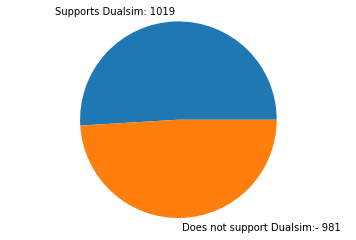

In [9]:
#pie chart representation
x=project_data['dual_sim'].value_counts()
labels='Supports Dualsim: '+str(x[1]),'Does not support Dualsim:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Observations:-                       
1.1019 mobile phones are Dualsim Enabled                   
2.981  phones does not support  Dualsim feature

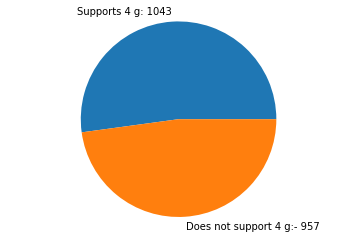

In [10]:
#pie chart representation
x=project_data['four_g'].value_counts()
labels='Supports 4 g: '+str(x[1]),'Does not support 4 g:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Observations:-                       
1.1043  phones are 4g Enabled                   
2.957   phones does not support  4g

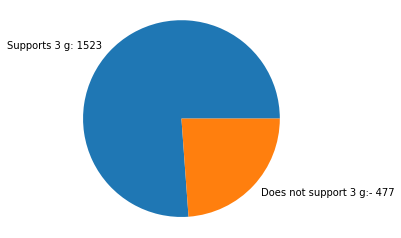

In [11]:
#pie chart representation
x=project_data['three_g'].value_counts()
labels='Supports 3 g: '+str(x[1]),'Does not support 3 g:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Observations:-                       
1.1523  phones are 3g Enabled                   
2.447   phones does not support  3g                                        
Most of the phones are 3g enabled

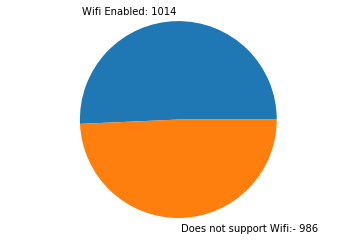

In [12]:
#pie chart representation
x=project_data['wifi'].value_counts()
labels='Wifi Enabled: '+str(x[1]),'Does not support Wifi:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Observations:-                       
1.1014 mobile phones supports WIFI                  
2.986  mobile phones does not support  WIFI

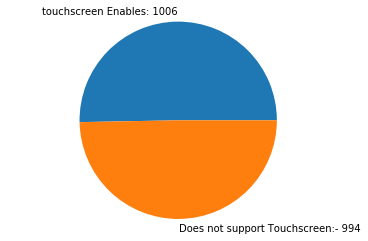

In [13]:
#pie chart representation
x=project_data['touch_screen'].value_counts()
labels='touchscreen Enables: '+str(x[1]),'Does not support Touchscreen:- '+str(x[0])
sizes=[x[1],x[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Observations:-                       
1.1006  phones have screen touch feature                  
2.994   phones does not have screen touch feature

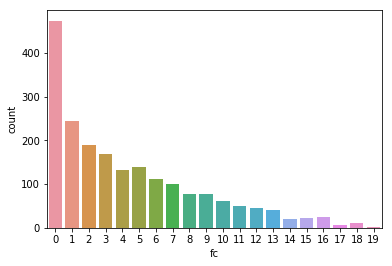

In [14]:
sns.countplot(x='fc', data=project_data)
plt.show()

Observations:-                       
Most of the phones have front camera megapixels =0 means many of the phones does not have camera

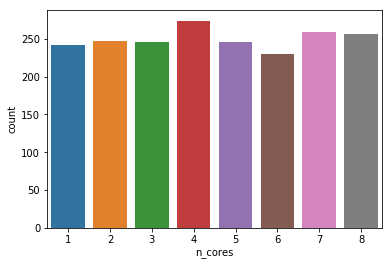

In [15]:
sns.countplot(x='n_cores', data=project_data)
plt.show()

Observations:-                       
There is less variation in number of cores

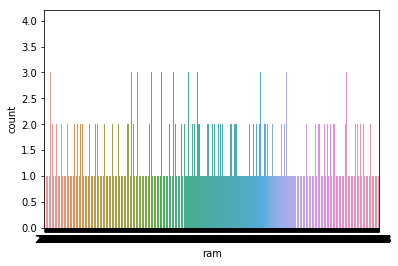

In [16]:
sns.countplot(x='ram', data=project_data)
plt.show()

Observations:-                       
ram as lot of Unique values

## Bivariate Anlysis

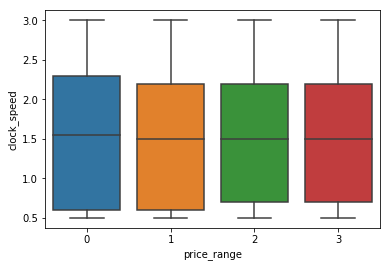

In [17]:
sns.boxplot(y='clock_speed',x='price_range',data=project_data)
plt.show()

Observations:-                       
clock speed does'nt have much impact on the price of a phone

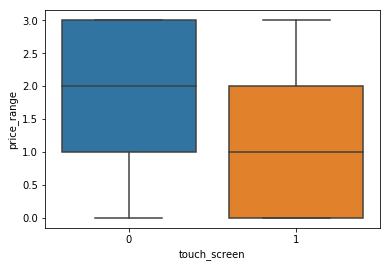

In [18]:
sns.boxplot(x='touch_screen',y='price_range',data=project_data)
plt.show()

Observations:-                       
Touch screen phones are more costlier than the other phones

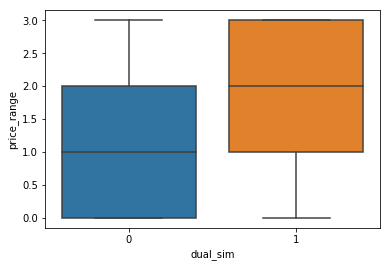

In [19]:
sns.boxplot(x='dual_sim',y='price_range',data=project_data)
plt.show()

Observations:-                       
Phones that support dual sim are more costlier than the other which don't

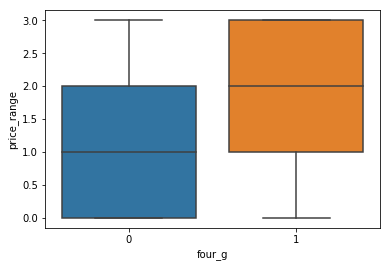

In [20]:
sns.boxplot(x='four_g',y='price_range',data=project_data)
plt.show()

Observations:-                       
Phones that 4g enabled are more costlier than the other phones

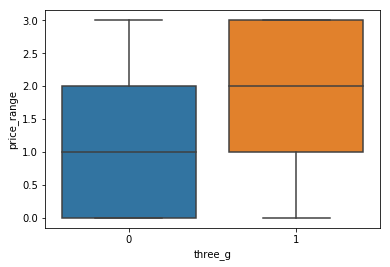

In [21]:
sns.boxplot(x='three_g',y='price_range',data=project_data)
plt.show()

Observations:-                       
Phones that 3g enabled are more costlier than the phones that does'nt support 3g 

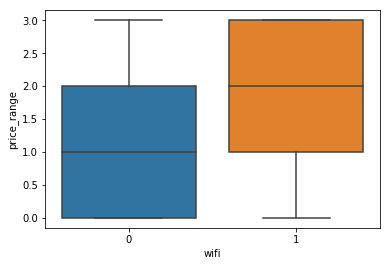

In [22]:
sns.boxplot(x='wifi',y='price_range',data=project_data)
plt.show()

Observations:-                       
Phones that has WIFI are more costlier than the other which does not have WIFI

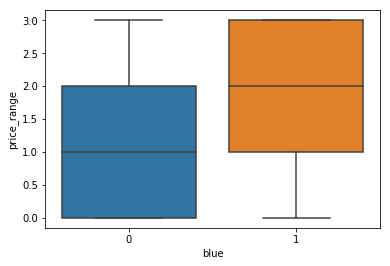

In [23]:
sns.boxplot(x='blue',y='price_range',data=project_data)
plt.show()

Observations:-                       
Phones that has bluetooth are more costlier than the other which don't

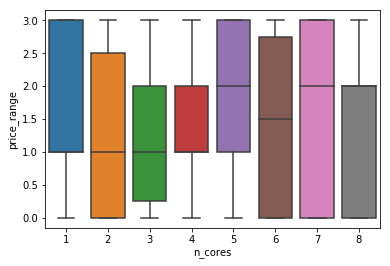

In [24]:
sns.boxplot(x='n_cores',y='price_range',data=project_data)
plt.show()

Observations:-                       
number of cores doesn't have much impact on the price range of a phone

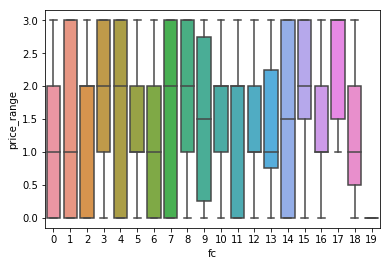

In [25]:
sns.boxplot(x='fc',y='price_range',data=project_data)
plt.show()

Observations:-                       
front camera pixels doesn't have much impact on the price range of a phone

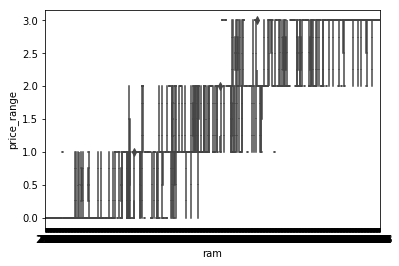

In [26]:
sns.boxplot(x='ram',y='price_range',data=project_data)

Observation:-                           
There are many different values for ram but we can clearly see that has ram increases price range also increases

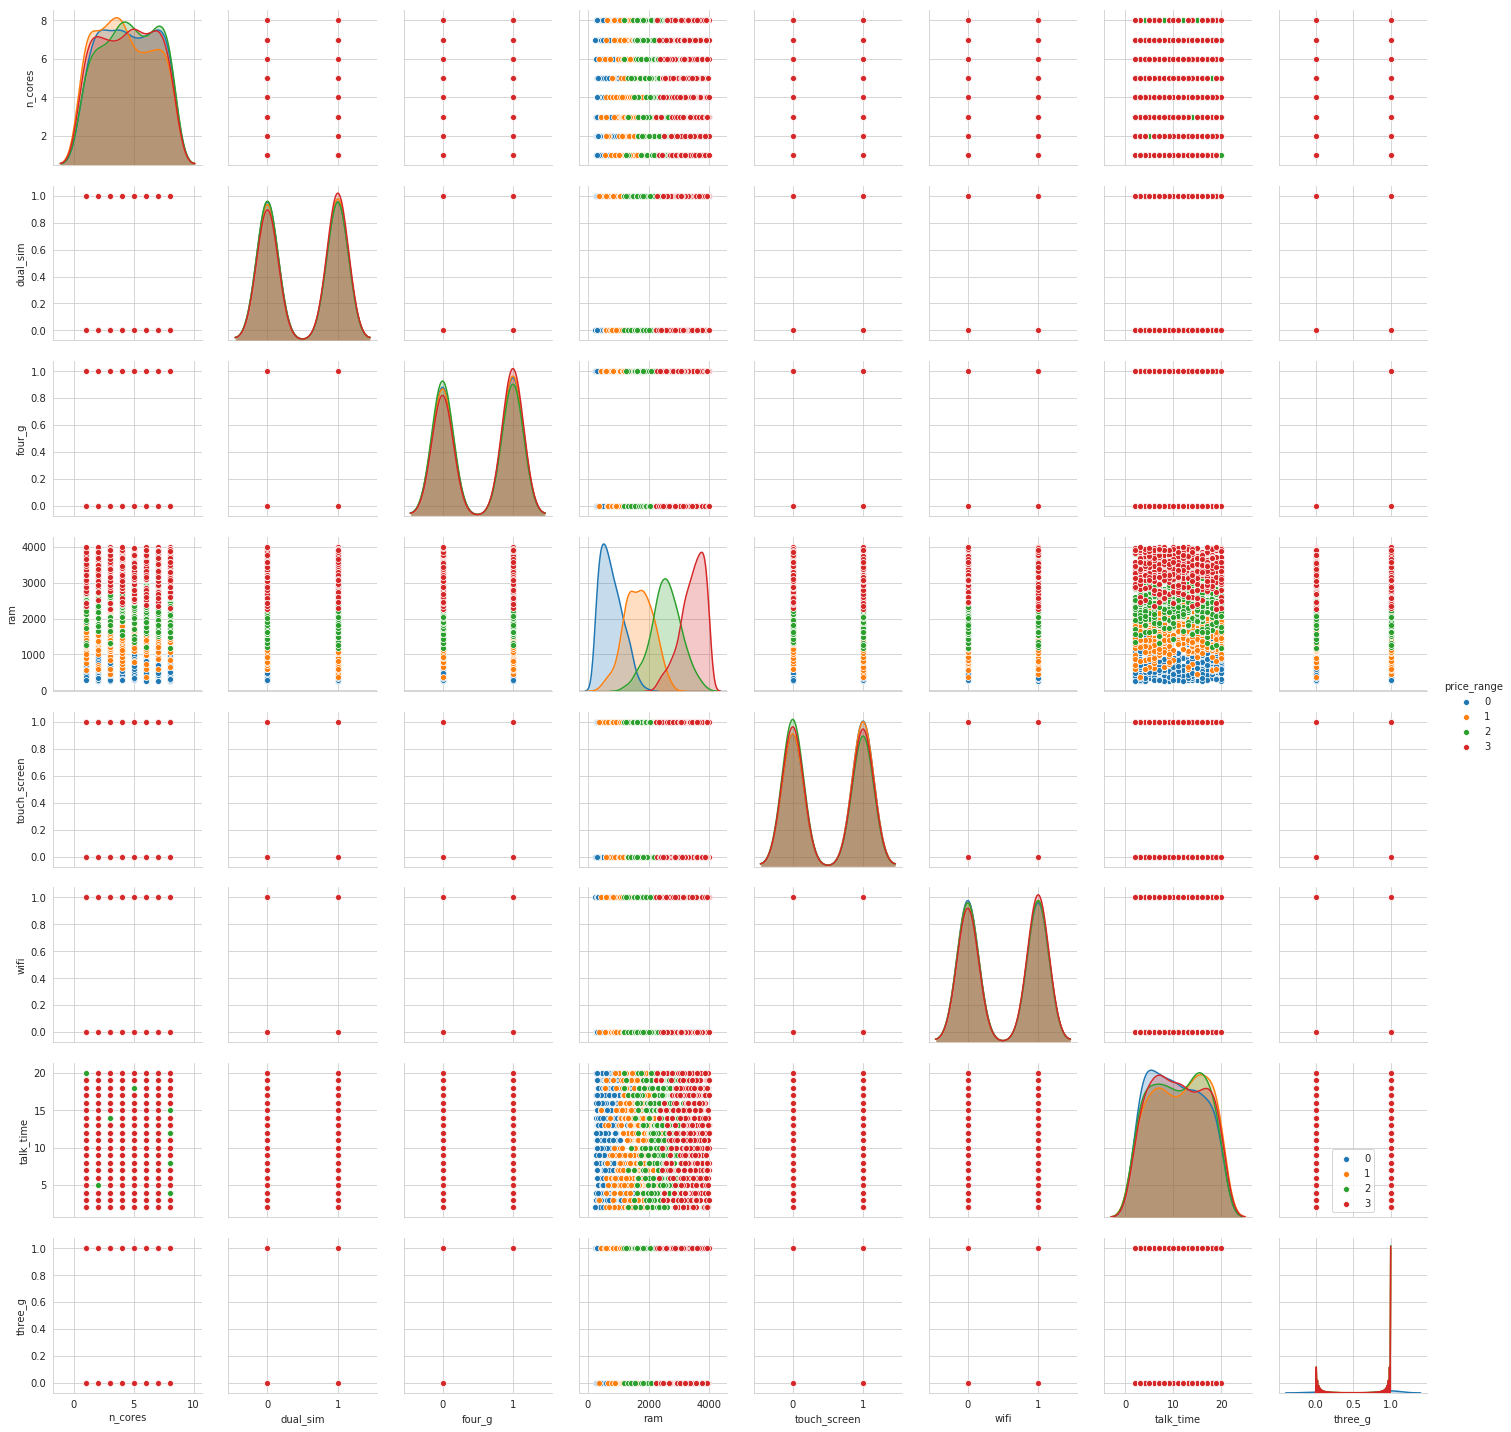

In [27]:
# pairwise scatter plot: Pair-Plot.
sns.set_style("whitegrid");
sns.pairplot(project_data,hue='price_range',vars=['n_cores', 'dual_sim','four_g', 'ram','touch_screen','wifi','talk_time','three_g'])
plt.legend()
plt.show() 

Observations:-                       
ram and number of number of cores can easily differentiate price ranges of the mobile phones 

***Other features plots where removed because no proper observations were made from those plots***

## Making Data Model Ready

In [28]:
# considering only those features that has impact on price_range from our anlysis
x = project_data[['three_g','battery_power','blue','dual_sim','four_g','px_height','px_width','ram','touch_screen','wifi','fc']]
y = project_data['price_range']
print("shape of x train is" ,x.shape)
print("shape of y train is" ,y.shape)

shape of x train is (2000, 11)
shape of y train is (2000,)


In [29]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print("shape of x train is: ",x_train.shape)
print("shape of y test is-" ,y_test.shape)


shape of x train is:  (1400, 11)
shape of y test is- (600,)


# Applying Models on the Data

### Logistic Regression 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
model = LogisticRegression()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))

Train Set Accuracy:85.28571428571429
Test Set Accuracy:82.83333333333334


Train Confusion Matrix


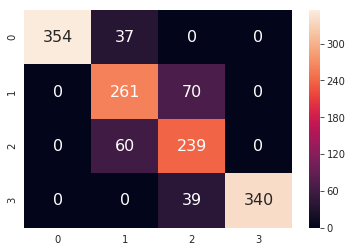

In [32]:
print("Train Confusion Matrix")
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train_pred,y_train), annot=True,annot_kws={"size": 16}, fmt='g')
plt.show()

Test Confusion Matrix


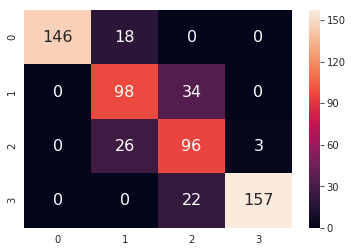

In [33]:
print("Test Confusion Matrix")
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test_pred,y_test), annot=True,annot_kws={"size": 16}, fmt='g')
plt.show()

### Support Vector Classifier SVC

In [34]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))

Train Set Accuracy:97.0
Test Set Accuracy:88.0


Train Confusion Matrix


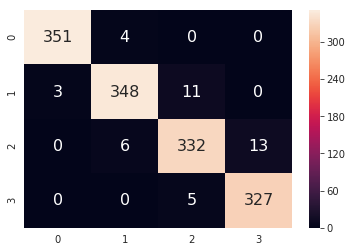

In [35]:
print("Train Confusion Matrix")
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train_pred,y_train), annot=True,annot_kws={"size": 16}, fmt='g')
plt.show()

Test Confusion Matrix


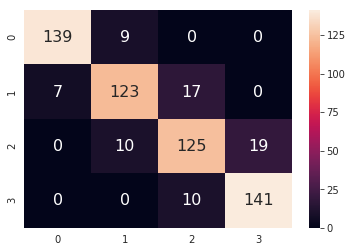

In [36]:
print("Test Confusion Matrix")
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test_pred,y_test), annot=True,annot_kws={"size": 16}, fmt='g')
plt.show()

### Decision Tree Classifier classifier

In [37]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(min_samples_split=10)#we use  min sample split value for preventing model from overfitting 
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))

Train Set Accuracy:96.35714285714285
Test Set Accuracy:85.33333333333334


Train Confusion Matrix


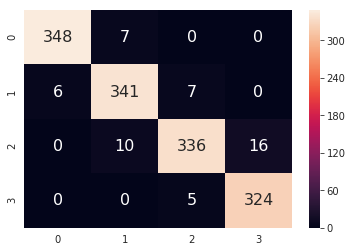

In [38]:
print("Train Confusion Matrix")
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train_pred,y_train), annot=True,annot_kws={"size": 16}, fmt='g')
plt.show()

Test Confusion Matrix


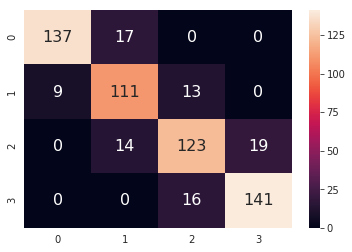

In [39]:
print("Test Confusion Matrix")
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test_pred,y_test), annot=True,annot_kws={"size": 16}, fmt='g')
plt.show()

In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(min_samples_split=10)
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))

Train Set Accuracy:97.64285714285714
Test Set Accuracy:86.33333333333333


Train Confusion Matrix


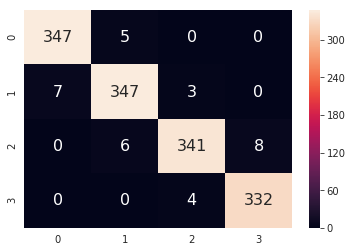

In [41]:
print("Train Confusion Matrix")
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train_pred,y_train), annot=True,annot_kws={"size": 16}, fmt='g')
plt.show()

Test Confusion Matrix


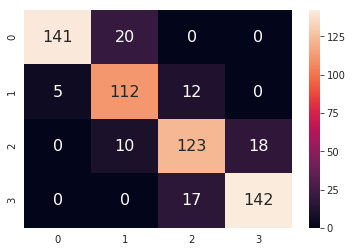

In [42]:
print("Test Confusion Matrix")
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test_pred,y_test), annot=True,annot_kws={"size": 16}, fmt='g')
plt.show()

In [43]:
project_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# SUMMARY:

**EDA SUMMARY:-**                                      
*ram has direct impact on the price range of the phones*              
*Features like                      
 1.Dual sim                      
 2.wifi                   
 3.4g                              
 4.3g                          
 5.Touch screen                        
Has more impact on the phones prices*


In [44]:
#Models Summary
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model","Test Accuracy"]
x.add_row(["Logistic Regression(LR)",81.83])
x.add_row(["Suppoer Vector Classifier(SVC)",86.6])
x.add_row(["Decision Tree Classsifier",82.6])
x.add_row(["Random Forest",85.3])
print(x)

+--------------------------------+---------------+
|             Model              | Test Accuracy |
+--------------------------------+---------------+
|    Logistic Regression(LR)     |     81.83     |
| Suppoer Vector Classifier(SVC) |      86.6     |
|   Decision Tree Classsifier    |      82.6     |
|         Random Forest          |      85.3     |
+--------------------------------+---------------+


**Support Vector classifier has more accuracy than other classification models**